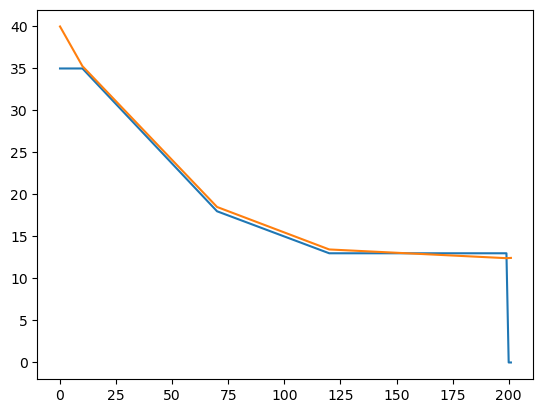

In [1]:
import math, cmath
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

#First-year ice surface salinity (thick)
thick=np.array([0,10,70,120,199,200,201])
sal=np.array([35,35,18,13,13,0,0])
simt=40*np.exp(-2.8*thick/200)+10*thick/200
fx=interp1d(thick,sal)
isal=fx(range(150))
plt.plot(thick,sal)
plt.plot(thick,simt)
plt.show()

[2.00000000e+01 1.21306132e+01 7.35758882e+00 4.46260320e+00
 2.70670566e+00 1.64169997e+00 9.95741367e-01 6.03947668e-01
 3.66312778e-01 2.22179931e-01 1.34758940e-01 8.17354288e-02
 4.95750435e-02 3.00687839e-02 1.82376393e-02 1.10616874e-02
 6.70925256e-03 4.06936738e-03 2.46819608e-03 1.49703660e-03]


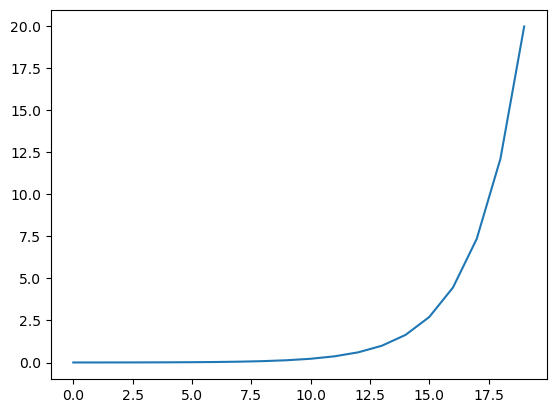

[1.49703660e-03 2.46819608e-03 4.06936738e-03 6.70925256e-03
 1.10616874e-02 1.82376393e-02 3.00687839e-02 4.95750435e-02
 8.17354288e-02 1.34758940e-01 2.22179931e-01 3.66312778e-01
 6.03947668e-01 9.95741367e-01 1.64169997e+00 2.70670566e+00
 4.46260320e+00 7.35758882e+00 1.21306132e+01 2.00000000e+01]


In [2]:
#First-year ice snow salinity (snowthickness, ice_surf_salinity)
snowthickness = 20
ice_surf_salinity = 20
depth=np.array(range(snowthickness))

snow_sal = ice_surf_salinity*np.exp(-10.0*(depth/snowthickness))
print(snow_sal)
snow_sal=np.flipud(snow_sal)
plt.plot(snow_sal)
plt.show()
print(snow_sal)

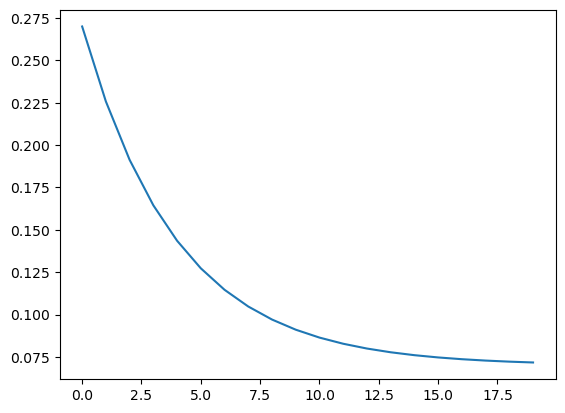

In [3]:
snowthickness = 20
snow_grain_size = 20
depth=np.array(range(snowthickness))

snow_pcc = 0.01*snow_grain_size*np.exp(-5.0*(depth/snowthickness))+0.07

plt.plot(snow_pcc)
plt.show()

[330 330 330 330 330 330 330 330 330 330 330 330 330 330 330 250 250 250
 250 250]


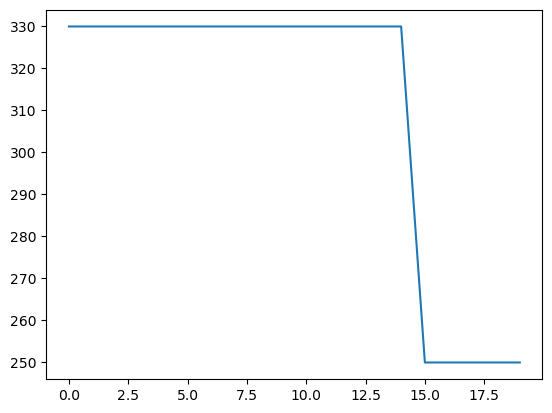

In [4]:
#snow density
snowthickness=20
density=np.array(range(snowthickness))
w=int((np.floor(snowthickness/4)))
if snowthickness < 4: density[:]=330.0
else:
    density[0:w]=250.0
    density[w:]=330.0
density=np.flipud(density)
print(density)  
plt.plot(density)
plt.show()

In [5]:
#First-year ice density (icethickness)
icethickness=150
fy_density=np.zeros(icethickness)
fy_density[:]=926.0
print(fy_density)

[926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926.
 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926.
 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926.
 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926.
 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926.
 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926.
 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926.
 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926.
 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926.
 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926. 926.
 926. 926. 926. 926. 926. 926. 926. 926. 926. 926.]


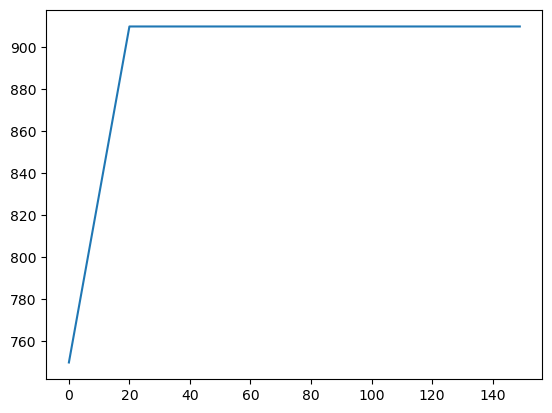

In [7]:
hs=20
hi=150

#Multiyear ice density Hummock (icethickness)
icethickness=150
my_density=np.zeros(icethickness)
humdens=np.zeros(20)
tdens=750.0
bdens=910.0
for i in range(20):
    humdens[i]=tdens+i*(bdens-tdens)/20
my_density[0:20]=humdens[:]
my_density[hs:hs+hi]=bdens
plt.plot(my_density)
plt.show()

260.30689655172415


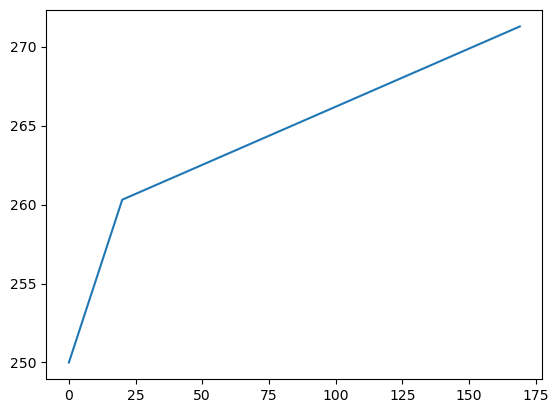

In [8]:
#Temperature profile (snowdepth, icethickness, airtemperature)
ks=0.3
ki=2.1

hs=20
hi=150

Tw=271.35
Ta=250.0
f=(ks*hi)/(ki*hs)
Tsi=(Tw+f*Ta)/(f+1)

snowtemp=np.zeros(int(hs))
icetemp=np.zeros(int(hi))
tempprof=np.zeros(int(hs+hi))

for i in range(hs):
    snowtemp[i]=Ta+i*(Tsi-Ta)/hs
for j in range(hi):
    icetemp[j]=Tsi+j*(Tw-Tsi)/hi
tempprof[0:hs]=snowtemp[:]
tempprof[hs:hs+hi]=icetemp[:]
plt.plot(tempprof)
print(Tsi)

0 13.539240811090153 14.24 7.88
5 12.714690214747973 13.2705 7.8004999999999995
10 11.981300440777197 12.301 7.721
15 11.328359810186257 11.3315 7.6415
20 10.746415299443598 10.362 7.561999999999999
25 10.22712464456258 9.3925 7.4825
30 9.763125823414434 8.423 7.403
35 9.347921874273776 7.4535 7.3235
40 8.97577924854174 6.484 7.244
45 8.641638107338999 5.5145 7.1645
50 8.341033158526983 4.545 7.085
55 8.070023795624259 3.5755 7.0055
60 7.8251324456166635 2.606 6.926
65 7.603290161090684 1.6364999999999998 6.8465
70 7.4017886054597 0.6669999999999998 6.7669999999999995
75 7.2182376800748616 -0.3025000000000002 6.6875
80 7.0505281302816885 -1.2720000000000002 6.608
85 6.896798545380838 -2.2415000000000003 6.5285
90 6.755406236195706 -3.2110000000000003 6.449
95 6.624901534616025 -4.1805 6.3695
100 6.5040051130247125 -5.15 6.29
105 6.391587968762302 -6.1195 6.2105
110 6.286653760478802 -7.089 6.130999999999999
115 6.188323220018927 -8.0585 6.0515
120 6.095820395959102 -9.028 5.97199999999

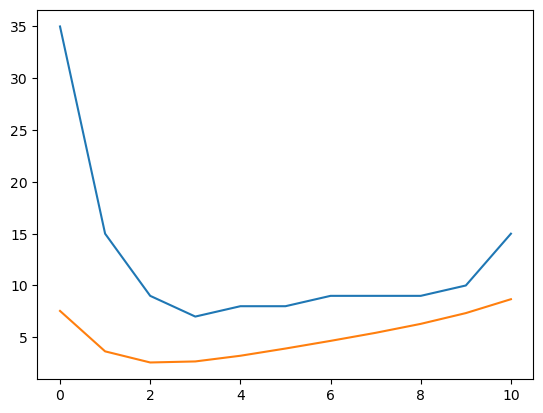

In [9]:
#First-year ice salinity profile (icethickness)
import numpy as np
it=10.0
thick=10.0
depth = np.array([ 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,10.0])
new =   np.array([35.0,15.0, 9.0, 7.0, 8.0, 8.0, 9.0, 9.0, 9.0,10.0,15.0])
simsal = 4.0*np.exp(1.0-(depth/10.0))+1.5*np.exp(depth/10.0)
for i in range(0,200,5):
    thick=i
    #simt=40*np.exp(-2.8*thick/200)+10*thick/200
    simt=40*np.exp(-5*thick/200)+10*thick/200
    ex=simt*np.exp(-8*depth/it)+np.exp(2.5*depth/it)+0.15*(-depth**2 + it*depth)-0.018*thick
    CW=14.24-19.39*(i/100.0)
    CW2=7.88-1.59*(i/100.0)
    print(i,sum(ex/11),CW, CW2)

fxp=interp1d(depth,new)
ipsu=fxp(range(11))
plt.plot(ipsu)
plt.plot(ex)
plt.show()

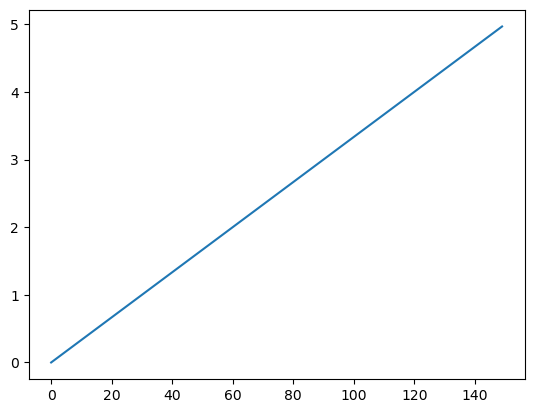

In [10]:
#Multiyearice salinity profile (thickness)
icethickness=150
my_salinity=np.zeros(icethickness)

tsal=0.0
bsal=5.0
for i in range(icethickness):
    my_salinity[i]=tsal+i*(bsal-tsal)/icethickness
plt.plot(my_salinity)
plt.show()

In [11]:
import numpy as np
def profile(snowt,icet,Ts,icetype):
    #snowt: snow thickness [m]
    #icet: ice thickness [m]
    #Ts: thermometric temperature of the surface
    #icetype: first- or multiyear ice ['fy'/'my']
    
    snow_grain_size = 20
    
    #compute num: layer number, top to bottom
    #total depth in cm
    hs=int(np.floor(snowt*100))
    hi=int(np.floor(icet*100))
    total_depth=int(hs+hi)
    num=np.array(range(total_depth))
    num=num+1
    
    #compute layer thickness
    di=0.01*np.ones(total_depth)
    
    #comute the thermometric temperature
    Ti=np.zeros(int(total_depth))
    snowtemp=np.zeros(int(hs))
    icetemp=np.zeros(int(hi))
    Tw=271.35
    ks=0.3
    ki=2.1
    #snedybden skal ikke være null her
    f=(ks*hi)/(ki*hs) 
    Tsi=(Tw+f*Ts)/(f+1)
    
    for i in range(hs):
        snowtemp[i]=Ts+i*(Tsi-Ts)/hs
    for j in range(hi):
        icetemp[j]=Tsi+j*(Tw-Tsi)/hi
        Ti[0:hs]=snowtemp[:]
        Ti[hs:hs+hi]=icetemp[:]
        
    #water content in the snow
    Wi=np.zeros(total_depth)
    
    #density profile : cox & weeks sammenhaeng mellem massefylde og saltindhold
    roi=np.zeros(total_depth)
    #snow density
    snow_density=np.ones(hs)
    w=int((np.floor(hs/4)))
    if hs < 4: snow_density[:]=330.0
    else:
        snow_density[0:w]=250.0
        snow_density[w:]=330.0
        snow_density=np.flipud(snow_density)
        
    #First-year ice density (icethickness)
    if icetype=='fy': 
        ice_density=np.zeros(hi)
        ice_density[:]=926.0
        
    #Multiyear ice density Hummock (icethickness)
    if icetype=='my':
        ice_density=np.zeros(hi)
        humdens=np.zeros(20)
        tdens=750.0
        bdens=910.0
        for i in range(20):
            humdens[i]=tdens+i*(bdens-tdens)/20
        ice_density[0:20]=humdens[:]
        ice_density[20:hi]=bdens
        
    roi[0:hs]=snow_density[:]
    roi[hs:hs+hi]=ice_density[:]
    
    #the scattering correlation length
    pci=np.zeros(total_depth)
    snow_pcc=np.zeros(hs)
    ice_pcc=np.zeros(hi)
    for i in range(hs):
        snow_pcc[i] = 0.01*snow_grain_size*np.exp(-3.0*(i/hs))+0.07
    snow_pcc=np.flipud(snow_pcc)
    if icetype=='fy': ice_pcc[:]=0.1
    elif icetype=='my': 
        ice_pcc[0:20]=1.5
        ice_pcc[20:hi]=0.2
    pci[0:hs]=snow_pcc[:]
    pci[hs:hi+hs]=ice_pcc[:]
    
    #the salinity
    snow_sal=np.zeros(hs)
    ice_sal=np.zeros(hi)
    simt=np.zeros(hi)
    sal=np.zeros(total_depth)
    CW2=7.88-1.59*(hi/100.0)
    
    #First-year ice snow and ice salinity
    if icetype=='fy':
        for i in range(hs):
            snow_sal[i] = 2*CW2*np.exp(-10.0*(i/hs))
        for j in range(hi):
            ice_sal[j]=(2*CW2*np.exp(-5*j/hi)+10.0*j/hi)*np.exp(-8.0*j/hi)+np.exp(2.5*j/hi)
    elif icetype=='my':
        tsal=0.0
        bsal=5.0
        snow_sal[:]=0.0
        for j in range(hi):
            ice_sal[j]=tsal+j*(bsal-tsal)/hi
    sal[0:hs]=np.flipud(snow_sal[:])
    sal[hs:hi+hs]=ice_sal[:]
   
    typei=np.ones(total_depth)
    snow_type=np.ones(hs)
    idx=(snow_pcc > 0.2)
    snow_type[idx]=2.0
    ice_type=np.ones(hi)
    if icetype=='fy': ice_type[:]=3
    elif icetype=='my': ice_type[:]=4
    
    typei[0:hs]=snow_type[:]
    typei[hs:hs+hi]=ice_type[:]
    
    si=np.zeros(total_depth)
    si[hs:hs+hi]=1.0
    
    return num, di, Ti, Wi, roi, pci, sal, typei, si

In [12]:
import numpy as np
def smrt_profile(snowt,icet,Ts,icetype):
    #snowt: snow thickness [m]
    #icet: ice thickness [m]
    #Ts: thermometric temperature of the surface
    #icetype: first- or multiyear ice ['firstyear'/'multiyear']
    
        
    #compute num: layer number, top to bottom
    #total depth in cm
    hs=int(np.floor(snowt*100))
    hi=int(np.floor(icet*100))
    total_depth=int(hs+hi)
    num=np.array(range(total_depth))
    num=num+1
    
    #compute layer thickness
    di=0.01*np.ones(total_depth)
    
    #comute the thermometric temperature
    Ti=np.zeros(int(total_depth))
    snowtemp=np.zeros(int(hs))
    icetemp=np.zeros(int(hi))
    Tw=271.35
    ks=0.3
    ki=2.1
    #snedybden skal ikke være null her
    f=(ks*hi)/(ki*hs) 
    Tsi=(Tw+f*Ts)/(f+1)
    
    for i in range(hs):
        snowtemp[i]=Ts+i*(Tsi-Ts)/hs
    for j in range(hi):
        icetemp[j]=Tsi+j*(Tw-Tsi)/hi
        Ti[0:hs]=snowtemp[:]
        Ti[hs:hs+hi]=icetemp[:]
        
    #water content in the snow
    Wi=np.zeros(total_depth)
    
    #density profile : cox & weeks sammenhaeng mellem massefylde og saltindhold
    roi=np.zeros(total_depth)
    #snow density
    snow_density=np.ones(hs)
    w=int((np.floor(hs/4)))
    if hs < 4: snow_density[:]=330.0
    else:
        snow_density[0:w]=250.0
        snow_density[w:]=330.0
        snow_density=np.flipud(snow_density)
        
    ice_density=np.zeros(hi)
    #First-year ice density (icethickness)
    if icetype=='firstyear': 
        ice_density[:]=926.0
        
    #Multiyear ice density Hummock (icethickness)
    if icetype=='multiyear':
        humdens=np.zeros(20)
        tdens=750.0
        bdens=910.0
        for i in range(20):
            humdens[i]=tdens+i*(bdens-tdens)/20
        ice_density[0:20]=humdens[:]
        ice_density[20:hi]=bdens
        
    roi[0:hs]=snow_density[:]
    roi[hs:hs+hi]=ice_density[:]
    
    #the scattering correlation length
    snow_grain_size = 20
    pci=np.zeros(total_depth)
    snow_pcc=np.zeros(hs)
    ice_pcc=np.zeros(hi)
    for i in range(hs):
        snow_pcc[i] = 0.01*snow_grain_size*np.exp(-3.0*(i/hs))+0.07
    snow_pcc=np.flipud(snow_pcc)
    if icetype=='firstyear': ice_pcc[:]=0.1
    elif icetype=='multiyear': 
        ice_pcc[0:20]=0.8
        ice_pcc[20:hi]=0.2
    pci[0:hs]=snow_pcc[:]
    pci[hs:hi+hs]=ice_pcc[:]
    
    #the salinity
    snow_sal=np.zeros(hs)
    ice_sal=np.zeros(hi)
    simt=np.zeros(hi)
    sal=np.zeros(total_depth)
    CW2=7.88-1.59*(hi/100.0)
    
    #First-year ice snow and ice salinity
    if icetype=='firstyear':
        for i in range(hs):
            snow_sal[i] = 2*CW2*np.exp(-10.0*(i/hs))
        for j in range(hi):
            ice_sal[j]=(2*CW2*np.exp(-5*j/hi)+10.0*j/hi)*np.exp(-8.0*j/hi)+np.exp(2.5*j/hi)
    elif icetype=='multiyear':
        tsal=0.0
        bsal=5.0
        snow_sal[:]=0.0
        for j in range(hi):
            ice_sal[j]=tsal+j*(bsal-tsal)/hi
    sal[0:hs]=np.flipud(snow_sal[:])
    sal[hs:hi+hs]=ice_sal[:]
   
    typei=np.ones(total_depth)
    snow_type=np.ones(hs)
    idx=(snow_pcc > 0.2)
    snow_type[idx]=2.0
    ice_type=np.ones(hi)
    if icetype=='firstyear': ice_type[:]=3
    elif icetype=='multiyear': ice_type[:]=4
    
    typei[0:hs]=snow_type[:]
    typei[hs:hs+hi]=ice_type[:]
    
    si=np.zeros(total_depth)
    si[hs:hs+hi]=1.0
    
    return num, di, Ti, Wi, roi, pci, sal, typei, si

SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000258BAAFF700>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000258BAAFF700>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000258BAAFF700>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000258BAAFF700>
SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000258BAAFF700>


C:\Users\fnifd\anaconda3\envs\Bachelor\lib\site-packages\smrt\permittivity\saline_snow.py:29: UserWarning: The permittivity model of Geldsetzer et al. 2009 (doi:10.1016/j.coldregions.2009.03.009) was developed for the frequency range 10 MHz - 40 GHz.
  warnings.warn(


SUBSTRATE: <smrt.substrate.flat.Flat object at 0x00000258BAAFF700>


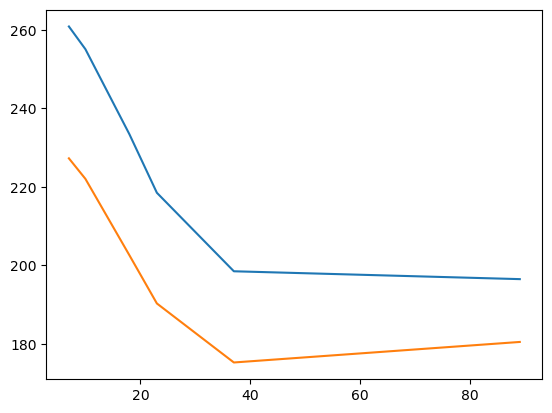

In [13]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("/home/rtt/code/smrt/smrt-master")
# export PYTHONPATH=$PYTHONPATH:/home/rtt/code/smrt/smrt-master
# local import
from smrt import make_ice_column, make_snowpack, make_model, sensor_list
from smrt import PSU
from smrt.permittivity.saline_snow import saline_snow_permittivity_geldsetzer09
#from smrt.inputs.make_medium import make_ice_column
ice_type = 'multiyear' # firstyear or multiyear sea ice
#smrt_profile inputs: snow depth, ice thickness, surface temperature, ice type, returns profiles
[num, di, Ti, Wi, roi, pci, sal, typei, si] = smrt_profile(0.15,2.15,250,ice_type)
#split into snow and sea ice indices
snow=(si==0)
ice=(si==1)
#the profiles: snow
thickness_snow=di[snow]
density_snow=roi[snow]
temperature_snow=Ti[snow]
p_ex_snow=pci[snow]*1e-3
salinity_snow=sal[snow]*PSU

#profiles: ice
thickness_ice=di[ice]
temperature_ice=Ti[ice]
salinity_ice=sal[ice]*PSU
density_ice=roi[ice]
p_ex_ice=pci[ice]*1e-3


ice_column = make_ice_column(ice_type=ice_type,
                            thickness=thickness_ice,
                            temperature=temperature_ice,
                            microstructure_model="exponential",
                            brine_inclusion_shape="spheres", 
                            salinity=salinity_ice, 
                            density = density_ice,
                            corr_length=p_ex_ice,
                            add_water_substrate="ocean"
                            )
snowpack = make_snowpack(thickness=thickness_snow,
                         microstructure_model="exponential",
                         density=density_snow,
                         temperature=temperature_snow,
                         corr_length=p_ex_snow,
                         salinity=salinity_snow,
                         ice_permittivity_model=saline_snow_permittivity_geldsetzer09)


#add snowpack on top of ice column:
medium = snowpack + ice_column

# create the sensor
sensor = sensor_list.amsre()

#n_max_stream = 128 #TB calculation is more accurate if number of streams is increased (currently: default = 32);
n_max_stream=32
#needs to be increased when using > 1 snow layer on top of sea ice! normalization="forced"
m = make_model("iba", "dort", rtsolver_options ={"n_max_stream": n_max_stream})

# run the model for snow-covered sea ice:
brightness_temperatures = m.run(sensor, medium)

# print TBs at horizontal and vertical polarization Tb's:
#print(brightness_temperatures.TbH(), brightness_temperatures.TbV())

freqs=np.array([7,10,18,23,37,89])
plt.plot(freqs,brightness_temperatures.TbV())
plt.plot(freqs,brightness_temperatures.TbH())
plt.show()



In [14]:
a=np.array([1,2,3,4,5,6,7])
idx=(a>3)
print(a[idx])

lamda=0.02
height=np.array([1.5, 1000,750000])
#height=10000
Df=(2*lamda*height)**0.5
print(Df)

[4 5 6 7]
[  0.24494897   6.32455532 173.20508076]
